In [11]:
import sys
import pandas as pd
import numpy as np

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from evaluation import evaluation_func as fp_eval

from collections import OrderedDict

In [12]:
color_dict = OrderedDict()

color_dict["Methods"] = OrderedDict({
    "FedProt":"black",
    "Fisher":"#E69F00",
    "Stouffer":"#D44400",
    "REM":"#009E73",
    "RankProd":"#2E5EAA"
})

# Read results

In [13]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/"

dfs = {}

workdir = root_dir + "downsampled/results" 
df = fp_eval.read_results(workdir,
                          deqms_name="/central_res.tsv",
                          fedprot_name="/DPE.csv")
dfs["downsampled"] = df

workdir = root_dir + "imbalanced/results"
df = fp_eval.read_results(workdir,
                          deqms_name="/central_res.tsv",
                          fedprot_name="/DPE.csv")
dfs["imbalanced"] = df


print(dfs["imbalanced"].shape)
dfs["imbalanced"].head(4)

Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/downsampled/results with 2238 genes. Adj.p-values were not log-transformed.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/imbalanced/results with 2233 genes. Adj.p-values were not log-transformed.


(2233, 12)


,pv_DEqMS,lfc_DEqMS,pv_FedProt,lfc_FedProt,lfc_Fisher,pv_Fisher,lfc_REM,pv_REM,pv_Stouffer,lfc_Stouffer,pv_RankProd,lfc_RankProd
A5A614,1.881049e-14,-0.811653,1.881049e-14,-0.811653,-0.880792,1.678558e-17,-0.796149,5.912082e-07,7.309722e-18,-0.880792,0.011966,-0.880792
O32583,3.566440e-11,-0.696815,3.566440e-11,-0.696815,-0.755888,1.054126e-09,-0.728249,1.708820e-10,2.808993e-10,-0.755888,0.019925,-0.755888
P00350,3.593048e-14,0.188426,3.593048e-14,0.188426,0.193647,2.331390e-16,0.198847,2.652811e-28,1.121031e-15,0.193647,0.194311,0.193647
P00363,8.967465e-04,-0.160897,8.967465e-04,-0.160897,-0.168874,7.428747e-03,-0.151859,1.805848e-03,2.140360e-02,-0.168874,0.516374,-0.168874


In [14]:
# log transform p-values in dfs, but first replace 0 with tiny value
log_dfs = {}
for k in dfs:
    df = dfs[k]
    df = df.replace(0,1e-300)
    df["pv_DEqMS"] = -np.log10(df["pv_DEqMS"])
    for m in ["FedProt", "Fisher","Stouffer","REM","RankProd"]:
        df["pv_"+m] = -np.log10(df["pv_"+m])
    log_dfs[k] = df

# Deviations in the results of decentralized methods

First - for balanced.  
adj. p-val:
- min diff (supplementary)
- mean diff,
- max diff, 
- r, 
- rho

log2FC - same, for supplementary.
  




## stats tables

In [15]:
for dataset in log_dfs:
    pval_basic_stats = fp_eval.calc_stats(
        log_dfs[dataset], 
        lfc_thr=0.5, adj_pval_thr=0.05,
        stats=[ "MeanDiff", "MaxDiff", "r", "ρ"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="pv_",
        top_genes=-1
    )
    # save to file, dataset to lower case
    dataset = dataset.lower()
    pval_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/log10pval_basic_stats.csv')


    lfc_basic_stats = fp_eval.calc_stats(
        log_dfs[dataset], 
        lfc_thr=0.5, adj_pval_thr=0.05,
        stats=["MeanDiff", "MaxDiff", "r", "ρ"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="lfc_",
        top_genes=-1
    )
    # save to file, dataset to lower case
    dataset = dataset.lower()
    lfc_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/log10lfc_basic_stats.csv')

    
    print(f'Dataset: {dataset}')
    print("\tP-value basic stats:")
    # print round values to 3 digits
    print(pval_basic_stats.round(3))     

Calculating corrs. Using p-vals - log-transformed.
Correlations computed for all genes from pv_ columns.
Correlations computed for all genes from lfc_ columns.
Calculating corrs. Using p-vals - log-transformed.
Correlations computed for all genes from pv_ columns.
Correlations computed for all genes from lfc_ columns.


Dataset: downsampled
	P-value basic stats:
          MeanDiff  MaxDiff      r      ρ
FedProt      0.000    0.000  1.000  1.000
Fisher       3.775   21.708  0.979  0.947
Stouffer     3.210   21.244  0.987  0.954
REM         14.152  260.122  0.757  0.914
RankProd    11.877   69.211  0.788  0.883
Dataset: imbalanced
	P-value basic stats:
          MeanDiff  MaxDiff      r      ρ
FedProt      0.000    0.000  1.000  1.000
Fisher       3.140   22.449  0.979  0.950
Stouffer     2.657   17.079  0.986  0.955
REM         14.845  270.368  0.749  0.912
RankProd    12.268   72.705  0.761  0.849


### correlation plots

Plotting corrs using p-vals - log-transformed.


downsampled           imbalanced          
                   r         ρ          r         ρ
FedProt     1.000000  1.000000   1.000000  1.000000
Fisher      0.978566  0.946744   0.978770  0.950461
Stouffer    0.986520  0.954267   0.985591  0.954894
REM         0.756805  0.914481   0.749208  0.912196
RankProd    0.788068  0.882943   0.761375  0.848756

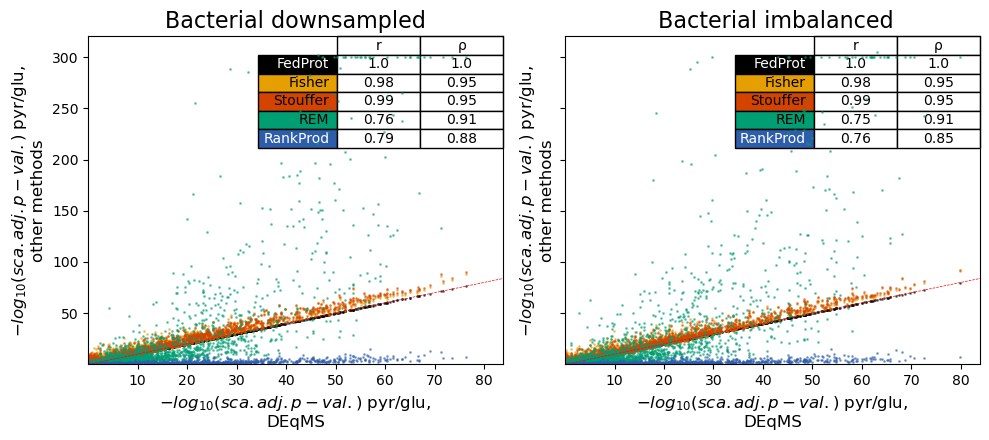

In [16]:
fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="pv_", 
    text="", dotsize=1,
    datasets=list(log_dfs.keys()),
    add_table=True, after_comma=2,
    titles=["Bacterial downsampled", " Bacterial imbalanced"]
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

Plotting corrs using logFC values.


downsampled           imbalanced          
                  r         ρ          r         ρ
FedProt    1.000000  1.000000   1.000000  1.000000
Fisher     0.999828  0.999698   0.999274  0.998398
REM        0.999276  0.997936   0.998722  0.996550

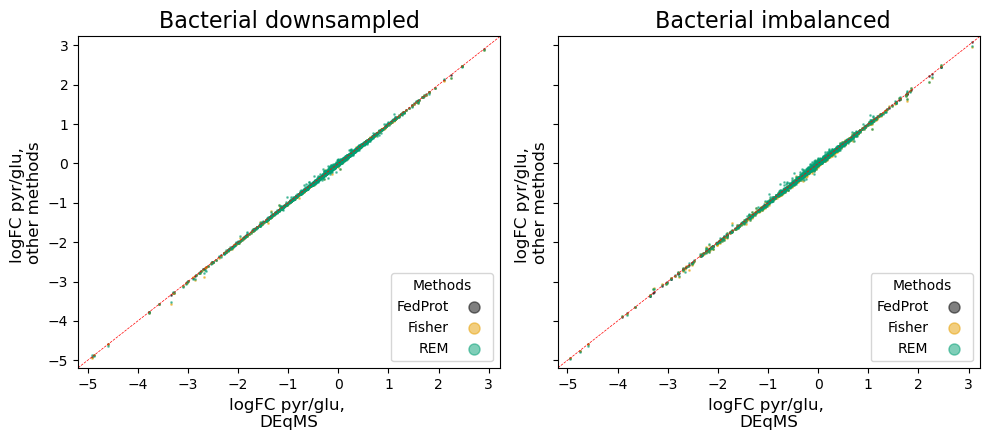

In [17]:
fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher", "REM"],
    color_dict=color_dict,
    what="lfc_", 
    text="", dotsize=1,
    datasets=list(log_dfs.keys()),
    add_table=False,
    titles=["Bacterial downsampled", " Bacterial imbalanced"],
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

# The consistency of differentially expressed protein lists


In [18]:
# calculate FP, FN and F1

for dataset in dfs:
    pval_basic_stats = fp_eval.calc_stats(
        log_dfs[dataset], 
        lfc_thr=0.5, adj_pval_thr=0.05,
        stats=["FP", "FN", "Jaccard"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="pv_",
        top_genes=-1
    )
    print(f'Dataset: {dataset}')
    print("\tFP, FN and F1:")
    print(pval_basic_stats)

    dataset = dataset.lower()
    pval_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/fp_fn_f1.csv')

Performance metrics calculated for all genes.


Performance metrics calculated for all genes.


Dataset: downsampled
	FP, FN and F1:
            FP    FN   Jaccard
FedProt    0.0   0.0  1.000000
Fisher     2.0   0.0  0.996661
Stouffer   2.0   0.0  0.996661
REM       13.0  17.0  0.950820
RankProd   0.0  64.0  0.892797
Dataset: imbalanced
	FP, FN and F1:
            FP    FN   Jaccard
FedProt    0.0   0.0  1.000000
Fisher    11.0   9.0  0.966387
Stouffer  11.0   9.0  0.966387
REM       13.0  24.0  0.938023
RankProd   5.0  67.0  0.877759


In [19]:
# Number of significant genes in DEqMS
for dataset in dfs:
    # get number of significant genes in DEqMS
    n_significant_DEqMS = dfs[dataset][(dfs[dataset]["pv_DEqMS"] < 0.05) & (abs(dfs[dataset]["lfc_DEqMS"]) > 0.5)].shape[0]
    print(f'Dataset: {dataset}')
    print(f'Number of significant genes in DEqMS: {n_significant_DEqMS}')

Dataset: downsampled
Number of significant genes in DEqMS: 597
Dataset: imbalanced
Number of significant genes in DEqMS: 584


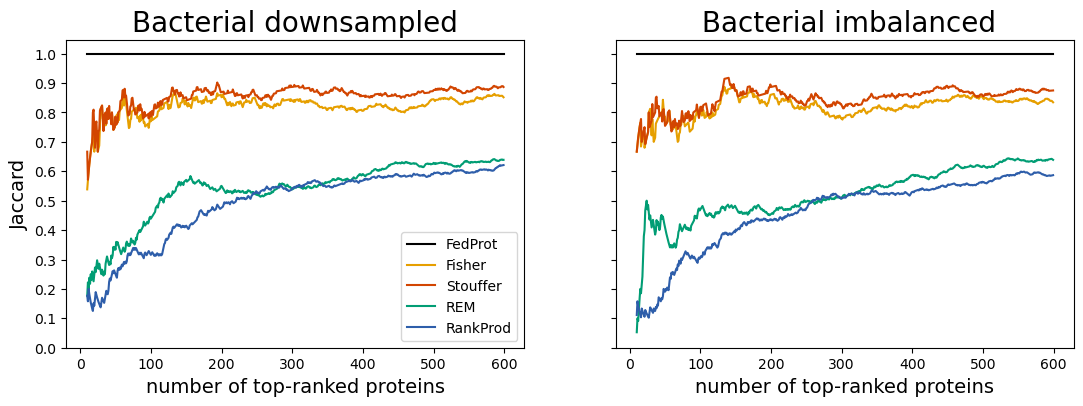

In [20]:
min_n_genes = 10
step = 1
max_n_genes = 600

data = fp_eval.plot_stats_for_topN(
    log_dfs,
    datasets = list(log_dfs.keys()),
    methods=["FedProt", "Fisher","Stouffer", "REM", "RankProd"],
    metrics=["Jaccard"],
    min_n_genes=min_n_genes,
    max_n_genes=max_n_genes,
    step=step,
    color_dict=color_dict,
    sharey=True,
    titles=["Bacterial downsampled", " Bacterial imbalanced"],
    )